In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from kmodes.kmodes import KModes

In [2]:
data = pd.read_csv('../0. Data/data_processed.csv')

In [4]:
data = data.drop('Unnamed: 0', axis=1)

In [5]:
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,4,1,0,0,0,0,...,1,0,5,1,0,1,0,9,4,3
1,0,0,0,0,2,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,2,0,0,0,0,1,...,1,1,5,1,1,1,0,9,4,8
3,0,1,0,1,2,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,1,0,0,0,1,1,...,1,0,2,0,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,4,0,0,0,0,1,...,1,0,3,0,0,0,1,5,6,7
253676,2,1,1,1,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,2,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,1,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [6]:
cost = []
for num_clusters in range(1,5):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 1, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1715899.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 44488, cost: 1554709.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 69511, cost: 1448784.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 79925, cost: 1460898.0
Run 1, iteration: 2/100, moves: 45835, cost: 1429361.0
Run 1, iteration: 3/100, moves: 8274, cost: 1429361.0


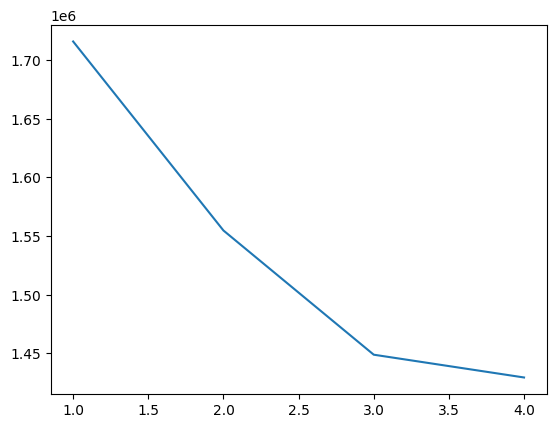

In [7]:
y = np.array([i for i in range(1,5)])
plt.plot(y, cost)

In [8]:
kmodes = KModes(n_clusters=3, init = "random", n_init = 1, verbose=1)
clusters = kmodes.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15514, cost: 1512312.0


In [9]:
data_with_clusters = data
data_with_clusters['Clusters'] = clusters

In [10]:
data_with_clusters

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Clusters
0,0,1,1,1,4,1,0,0,0,0,...,0,5,1,0,1,0,9,4,3,2
1,0,0,0,0,2,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,0
2,0,1,1,1,2,0,0,0,0,1,...,1,5,1,1,1,0,9,4,8,0
3,0,1,0,1,2,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,0
4,0,1,1,1,1,0,0,0,1,1,...,0,2,0,0,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,4,0,0,0,0,1,...,0,3,0,0,0,1,5,6,7,0
253676,2,1,1,1,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,2
253677,0,0,0,1,2,0,0,0,1,1,...,0,1,0,0,0,0,2,5,2,0
253678,0,1,0,1,1,0,0,0,0,1,...,0,3,0,0,0,1,7,5,1,0


In [11]:
kmodes.cluster_centroids_

array([[ 0,  0,  0,  1,  2,  0,  0,  0,  1,  1,  1,  0,  1,  0,  2,  0,
         0,  0,  0,  9,  6,  8],
       [ 0,  0,  0,  1,  3,  1,  0,  0,  0,  0,  1,  0,  1,  0,  2,  0,
         0,  0,  0,  5,  6,  8],
       [ 2,  1,  1,  1,  3,  1,  0,  0,  0,  0,  1,  0,  1,  0,  3,  0,
         0,  1,  0, 11,  4,  6]])

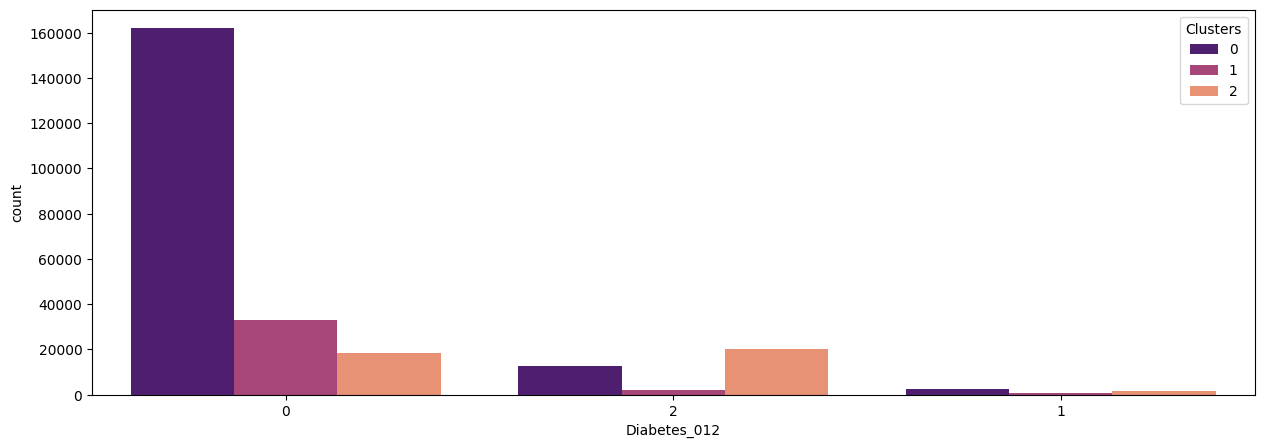

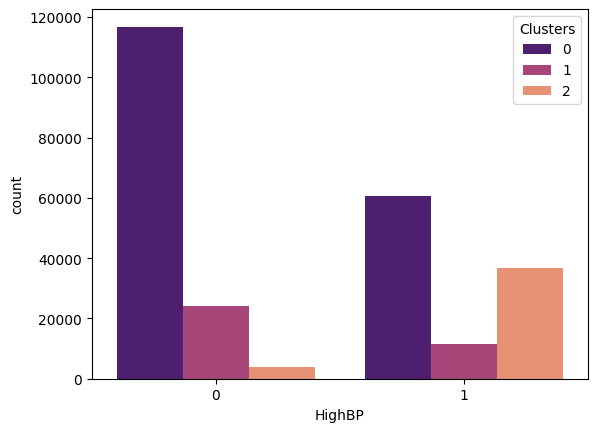

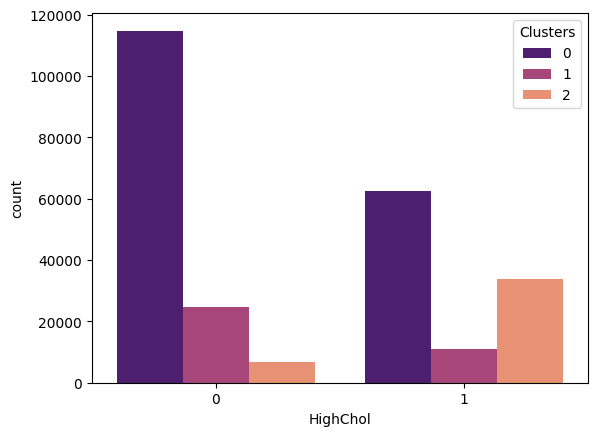

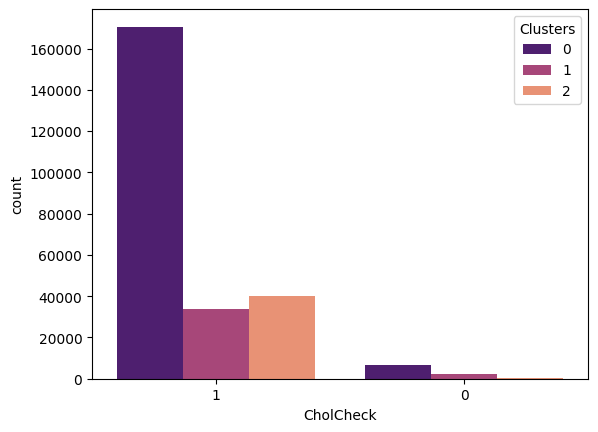

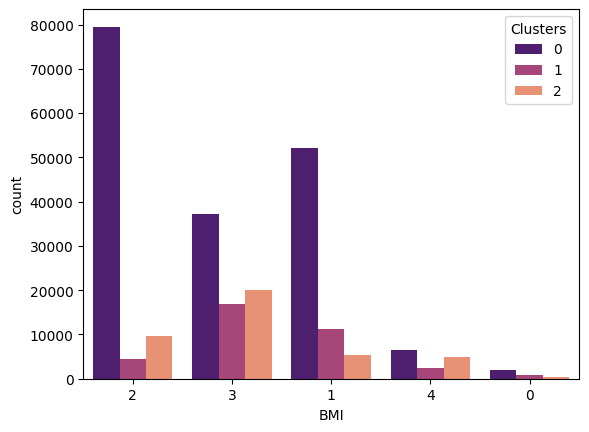

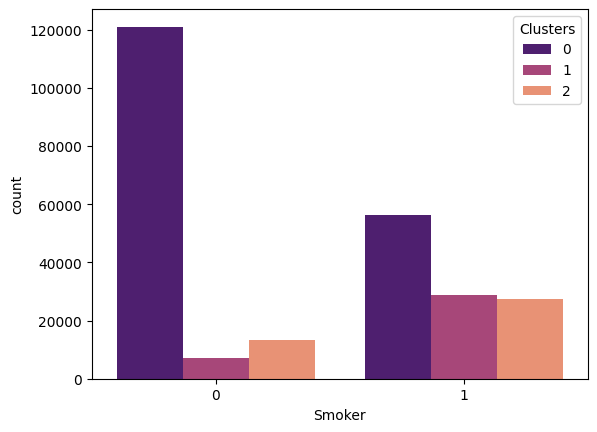

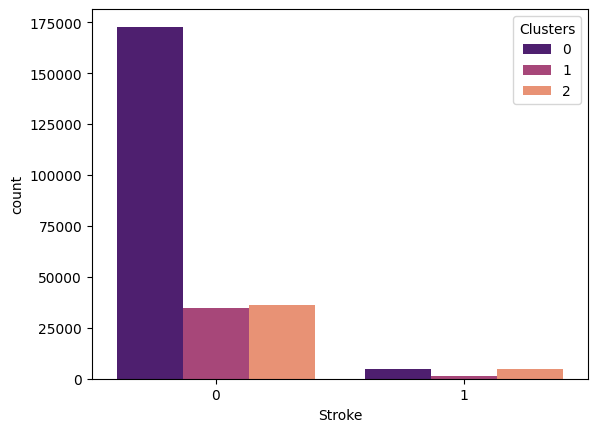

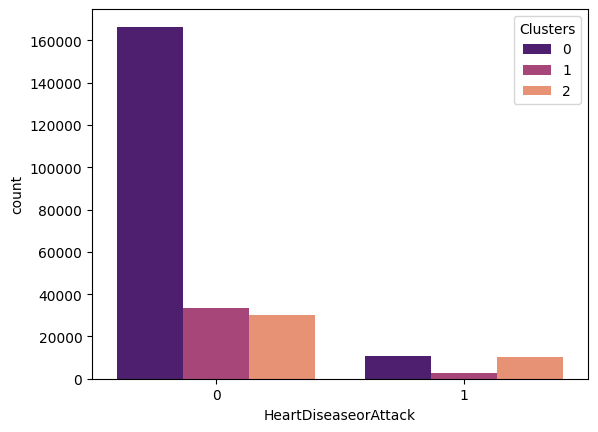

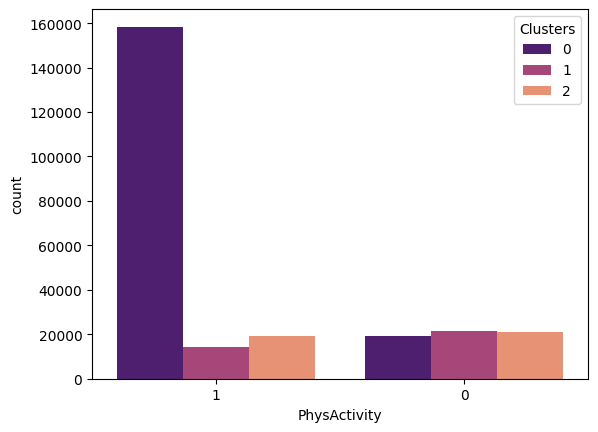

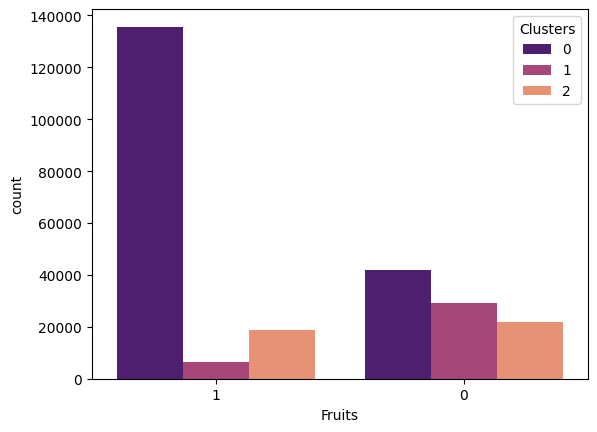

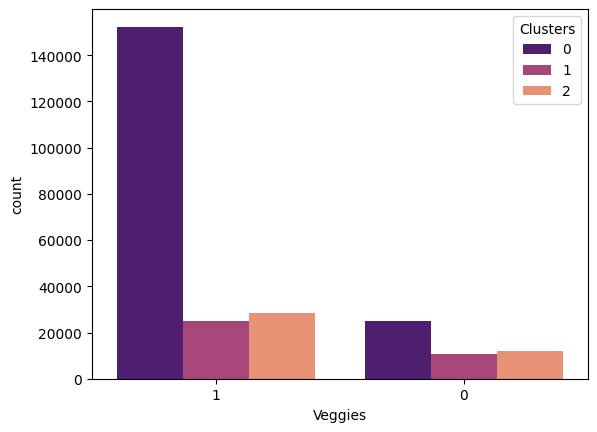

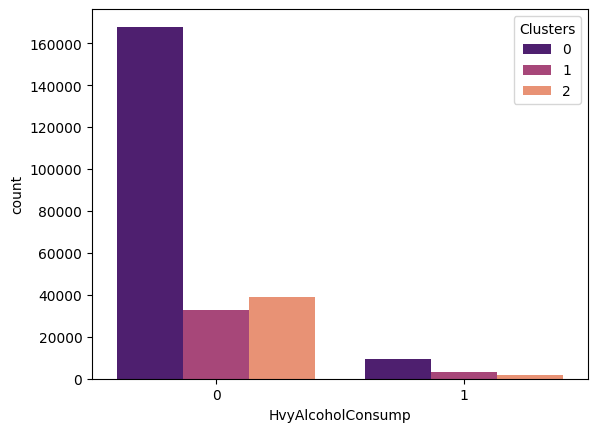

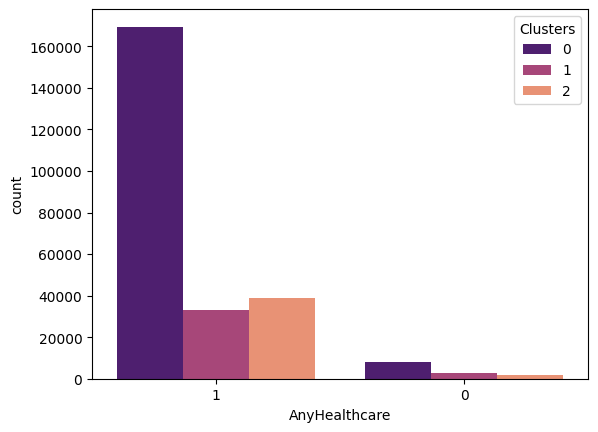

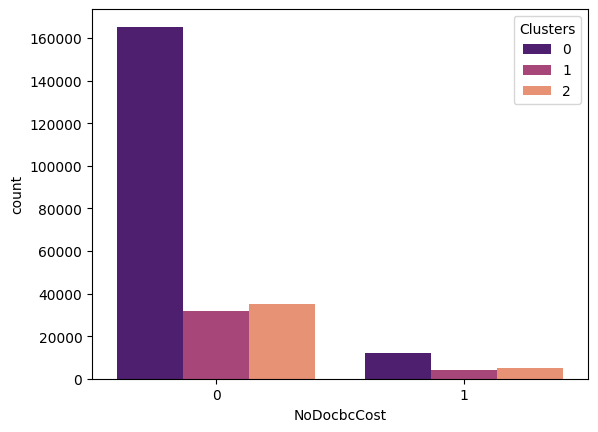

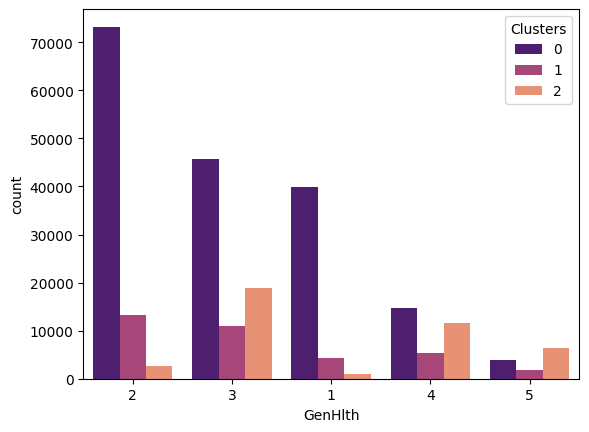

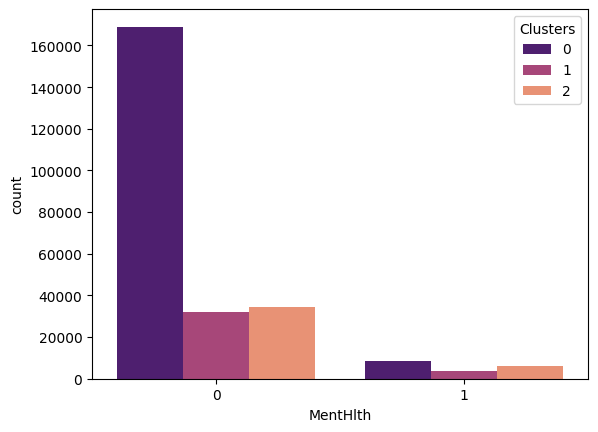

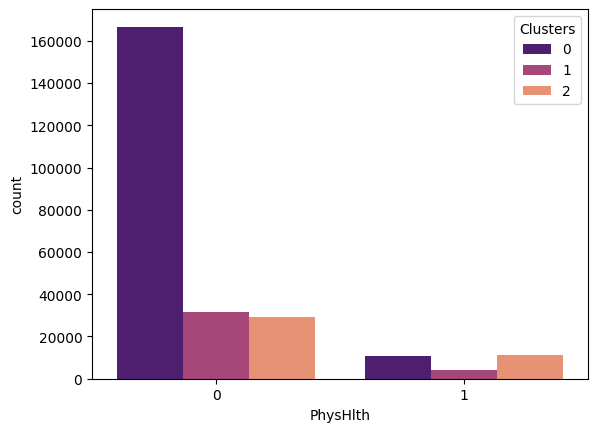

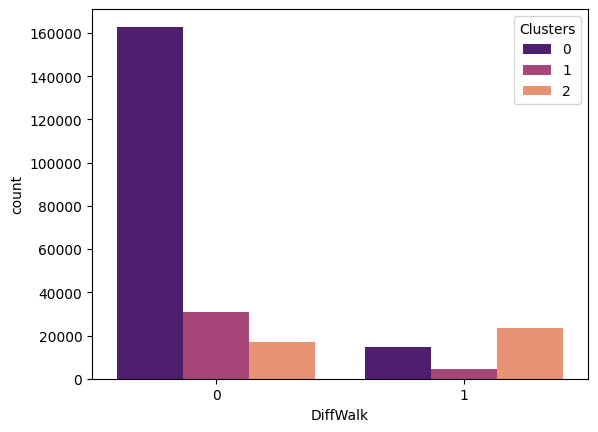

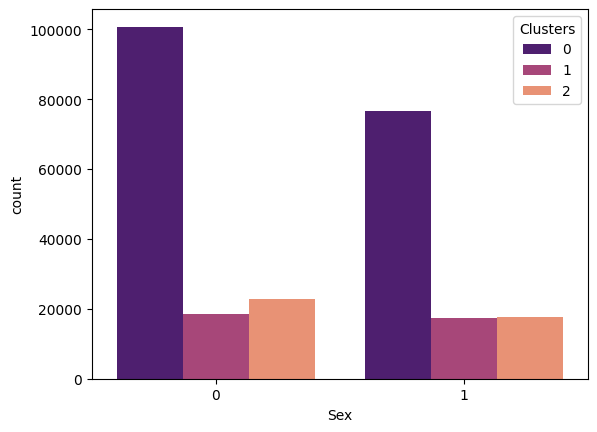

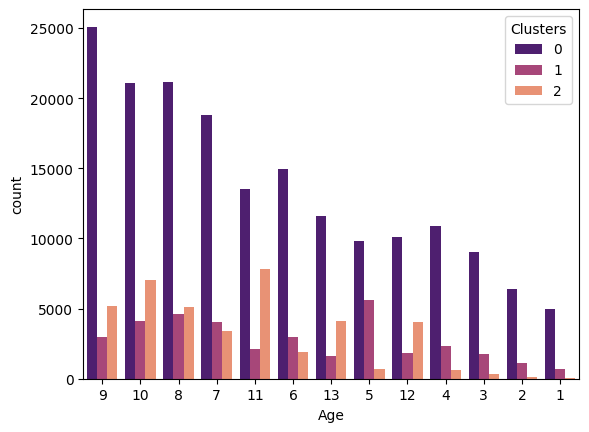

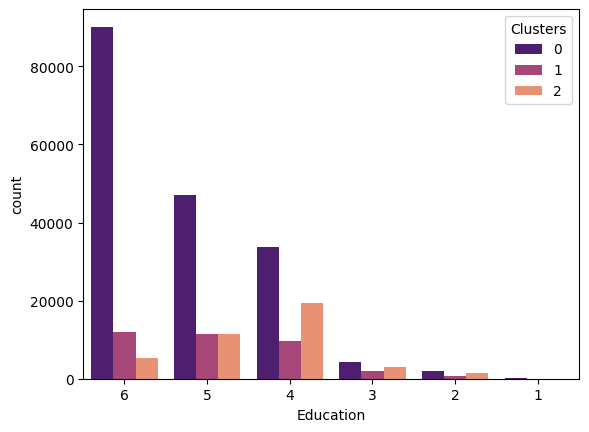

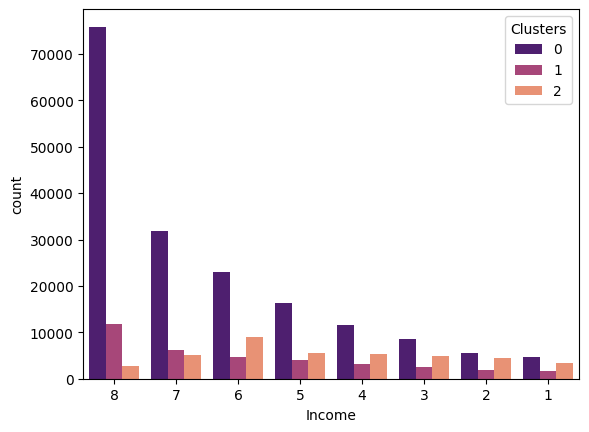

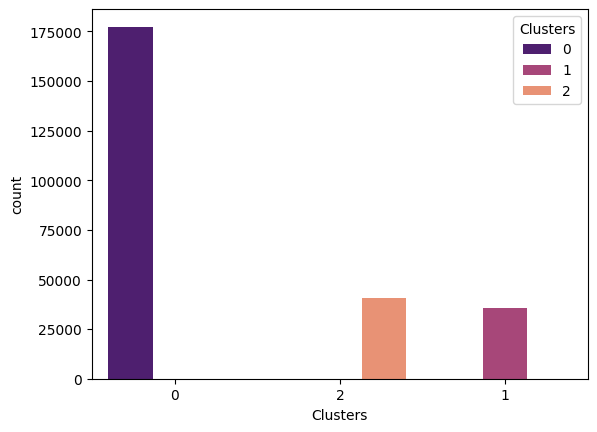

In [12]:
plt.subplots(figsize = (15,5))

for c in data.columns:
    sb.countplot(x = data_with_clusters[c], order = data_with_clusters[c].value_counts().index, hue = data_with_clusters['Clusters'], palette="magma")
    plt.show()